**Habilitando a GPU**

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print('HABILITANDO GPU - DONE')

Found GPU at: /device:GPU:0
HABILITANDO GPU - DONE


**Habilita a execução da GPU**

In [2]:
!nvidia-smi

Thu Oct  8 23:36:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    29W /  70W |    227MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Habilitando o Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

print('DONE')

Mounted at /content/drive
DONE


**Realizando os IMPORTS**

In [4]:
!pip install rich

     |████████████████████████████████| 163kB 5.5MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 


In [5]:
import time
import json
import csv
import os
from sklearn.datasets import load_svmlight_file
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score as sklearn_f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from rich.table import Table
import numpy
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

print('DONE')


DONE


**Metodos**

In [6]:
def get_time():
    return time.time()


def get_time_diff(start_time):
    end_time = time.time()
    return round_float(end_time - start_time)


def round_float(value):
    return float("{:.3f}".format(value))


def get_num_rows(file):
    return sum(1 for line in open(file))


def generate_hash():
    return f"{get_time():.0f}"


def get_orchestrator(input_file):
    orchestrator_json_file = open(input_file)
    orchestrator = json.load(orchestrator_json_file)
    orchestrator_json_file.close()
    return orchestrator


def get_tabulation(file, header, delimiter=','):
    tabulation_file = open(FILE_PATH_DRIVE + file, mode='w')
    tabulation_writer = csv.writer(tabulation_file, delimiter=delimiter, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    tabulation_writer.writerow(header)
    return [tabulation_writer, tabulation_file]


def save_tabulation_row(tabulation_writer, row):
    tabulation_writer.writerow(row)


def get_output_table(configs, experiment_hash):
    header = ['Classifier', 'F1Score', 'Accuracy', 'Precision', 'Recall', 'Execution Time (s)']
    file_name = configs["result_classifiers"].replace("{timestamp}", experiment_hash)
    tabulation_writer, tabulation_file = get_tabulation(file_name, header)
    result = {
        'tabulation_writer': tabulation_writer,
        'tabulation_file': tabulation_file,
    }
    return result


def save_tabulation_conf_mat(path, classifier, result_conf_mat, folder):
    mk_folder = FILE_PATH_DRIVE + path + "/" + folder
    if not os.path.exists(mk_folder):
        os.mkdir(mk_folder)
    tabulation_csv_file = open(
        mk_folder + "/" + str(classifier) + '.csv', mode='w')
    tabulation_writer = csv.writer(
        tabulation_csv_file, delimiter=';', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    tabulation_writer.writerows(result_conf_mat)


def print_result(classifier, result):
    execution_time = result["time"]
    table_results = Table(show_header=True, header_style="bold magenta")
    table_results.add_column("Type")
    table_results.add_column("Score")
    table_results.add_row("F1Score", str(result["f1_score"]))
    table_results.add_row("Accuracy", str(result["accuracy"]))
    table_results.add_row("Precision", str(result["precision"]))
    table_results.add_row("Recall", str(result["recall"]))
    print("\n")
    print(result["creport"])
    print("\n")
    print(table_results)
    print("\n")
    print(result["conf_mat"])
    print("\n")
    print(f"[bold red]Execution Time(s): ([white]{execution_time}[red])")


def save_result(configs, classifier, result):
    save_tabulation_conf_mat(configs["result_conf_mat"], classifier, result["conf_mat"], experiment_hash)
    output_table["tabulation_writer"].writerow([classifier, result["f1_score"], result["accuracy"], result["precision"], result["recall"], result["time"]])


def run_orchestrator(configs, experiments):
    start_time = time.time()
    print(f"[bold red]Starting Classifier ([white]Hash: {experiment_hash}[red])\n\n")
    print("[yellow]Starting Loading Files\n")
    x_train, y_train = load_svmlight_file(FILE_PATH_DRIVE + configs["svmlight_train_input"])
    x_test, y_test = load_svmlight_file(FILE_PATH_DRIVE + configs["svmlight_test_input"])
    x_train = x_train.toarray()
    x_test = x_test.toarray()
    print(f"[yellow]Finishing Loading Input Files [white bold]({get_time_diff(start_time)}s)\n")
    print(f"[green]Starting Experiment\n")
    for experiment in experiments:
        classifier = experiment['classifier']
        classifier_method = 'classify_' + classifier
        
        if classifier_method == 'classify_svm':
          method_to_call = classify_svm
        
        if classifier_method == 'classify_knn3':
          method_to_call = classify_knn3

        if classifier_method == 'classify_knn5':
          method_to_call = classify_knn5

        if classifier_method == 'classify_knn7':
          method_to_call = classify_knn7
        
        if classifier_method == 'classify_naive_bayes':
          method_to_call = classify_naive_bayes

        if classifier_method == 'classify_lda':
          method_to_call = classify_lda

        if classifier_method == 'classify_logistic_regression':
          method_to_call = classify_logistic_regression

        if classifier_method == 'classify_perceptron':
          method_to_call = classify_perceptron

        if classifier_method == 'classify_tree':
          method_to_call = classify_tree

        if classifier_method == 'classify_mlp':
          method_to_call = classify_mlp

        data = {
            'parameters': experiment['parameters'],
            'experiment_hash': experiment_hash,
            'start_time': start_time,
            'x_train': x_train,
            'y_train': y_train,
            'x_test': x_test,
            'y_test': y_test
        }
        result = method_to_call(data)
        start_time = time.time()
        print_result(classifier, result)
        save_result(configs, classifier, result)
    print(f"\n[green]Finishing Experiments")


def save_roc(folder, name, y_test, y_pred):
    mk_folder = FILE_PATH_DRIVE + "result/roc/" + folder
    if not os.path.exists(mk_folder):
        os.mkdir(mk_folder)
    output_file = mk_folder + "/" + name + ".png"
    output_general_file = mk_folder + "/" + "ROC.png"
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(name)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='roc ' + name)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve ' + name)
    plt.legend(loc='best')
    plt.savefig(output_file)

    plt.figure('general')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='roc ' + name)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve ' + name)
    plt.legend(loc='best')
    plt.savefig(output_general_file)


def save_conf_mat(folder, classifier, name, x_test, y_test):
    mk_folder = FILE_PATH_DRIVE + "result/conf_mat/" + folder
    if not os.path.exists(mk_folder):
        os.mkdir(mk_folder)
    output_file = mk_folder + "/" + name + ".png"
    disp = plot_confusion_matrix(classifier, x_test, y_test)
    disp.ax_.set_title("Confusion Matrix")
    plt.savefig(output_file)


print('DONE')

DONE


**Metodos CLASSIFICADOR**

In [7]:
def selecao_feature(X, y):
    print('SHAPE ENTRADA')
    print (X.shape)
    clf = ExtraTreesClassifier(n_estimators=100)
    clf = clf.fit(X,y)
    print("\n FEATURE IMPORTANCE")
    print(clf.feature_importances_)
    model = SelectFromModel(clf,prefit=True)
    X_new = model.transform(X)
    print('\nFim Selecao')
    return X_new

def log(type, name, start_time):
    if type == 'start':
        print(f"[white]Starting [blue]{name} -> [white]({get_time_diff(start_time)}s)")
    else:
        print(f"[yellow]Finishing [blue]{name} -> [white]({get_time_diff(start_time)}s)")


def classify_generic(classificator, data):
    start_time = data["start_time"]

    x_test = data["x_test"]
    y_test = data["y_test"]
    x_train = data["x_train"]
    y_train = data["y_train"]

    X_new = selecao_feature(x_train, y_train)

    x_train, x_test, y_train, y_test = train_test_split(X_new, y_train, test_size=0.2, random_state=0)

    experiment_hash = data["experiment_hash"]

    name = classificator.__class__.__name__

    print(f"\n[yellow]Classificator: [blue]{classificator}\n")

    log('start', 'fit', start_time)
    classificator.fit(x_train, y_train)
    log('end', 'fit', start_time)

    log('start', 'predict', start_time)
    predict = classificator.predict(x_test)
    log('end', 'predict', start_time)

    log('start', 'f1_score', start_time)
    f1_score = round_float(sklearn_f1_score(y_test, predict, labels=numpy.unique(predict), average='weighted'))
    log('end', 'f1_score', start_time)

    log('start', 'accuracy', start_time)
    accuracy = round_float(accuracy_score(y_test, predict))
    log('end', 'accuracy', start_time)

    log('start', 'precision', start_time)
    precision = round_float(precision_score(y_test, predict))
    log('end', 'precision', start_time)

    log('start', 'recall', start_time)
    recall = round_float(recall_score(y_test, predict))
    log('end', 'recall', start_time)

    log('start', 'conf_mat', start_time)
    conf_mat = confusion_matrix(y_test, predict.round())
    log('end', 'conf_mat', start_time)

    log('start', 'save_roc', start_time)
    save_roc(experiment_hash, name, y_test, predict)
    log('end', 'save_roc', start_time)

    log('start', 'save_conf_mat', start_time)
    save_conf_mat(experiment_hash, classificator, name, x_test, y_test)
    log('end', 'save_conf_mat', start_time)

    log('start', 'classification_report', start_time)
    creport = classification_report(y_test, predict, labels=[0, 1])
    log('end', 'save_conf_mat', start_time)

    time = round_float(get_time_diff(start_time))

    result = {
        'f1_score': f1_score,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'conf_mat': conf_mat,
        'creport': creport,
        'time': time
    }

    return result


def classify_svm(data):
    classificator = svm.LinearSVC(**data['parameters'])
    return classify_generic(classificator, data)


def classify_knn3(data):
    classificator = KNeighborsClassifier(3)
    return classify_generic(classificator, data)


def classify_knn5(data):
    classificator = KNeighborsClassifier(5)
    return classify_generic(classificator, data)


def classify_knn7(data):
    classificator = KNeighborsClassifier(7)
    return classify_generic(classificator, data)


def classify_naive_bayes(data):
    classificator = GaussianNB(**data['parameters'])
    return classify_generic(classificator, data)


def classify_lda(data):
    classificator = LinearDiscriminantAnalysis(**data['parameters'])
    return classify_generic(classificator, data)


def classify_logistic_regression(data):
    classificator = LogisticRegression(**data['parameters'])
    return classify_generic(classificator, data)


def classify_perceptron(data):
    classificator = Perceptron(**data['parameters'])
    return classify_generic(classificator, data)


def classify_tree(data):
    classificator = DecisionTreeClassifier(**data['parameters'])
    return classify_generic(classificator, data)


def classify_mlp(data):
    # normalizar com z-score
    classificator = MLPClassifier(**data['parameters'])
    return classify_generic(classificator, data)

print('DONE')

DONE


**Iniciando as variaveis**

In [10]:
FILE_PATH_DRIVE = '/content/drive/My Drive/Colab Notebooks/trab_final/'

FILE_ORCHESTRATOR = FILE_PATH_DRIVE + 'orchestrator/index_mdv.json'

experiment_hash = generate_hash()

output_table = {}

print('DONE')

DONE


**Classificando**

[bold red]Starting Classifier ([white]Hash: 1602200318[red])


[yellow]Starting Loading Files

[yellow]Finishing Loading Input Files [white bold](70.776s)

[green]Starting Experiment

SHAPE ENTRADA
(219984, 706)

 FEATURE IMPORTANCE
[2.18179576e-03 5.20176394e-04 1.42584481e-03 1.05843445e-07
 1.34196544e-03 1.28685583e-03 2.96445425e-03 2.58972514e-03
 3.80494830e-03 1.79089727e-03 5.31695182e-04 6.26251203e-04
 8.40712775e-04 8.45311664e-04 1.42225335e-03 1.08904582e-03
 1.61170595e-03 1.97298245e-03 1.38438721e-06 3.29443361e-06
 2.43372778e-06 2.01918952e-06 1.82706738e-03 1.47389464e-03
 2.69763042e-03 2.67037830e-03 1.06905910e-03 1.12564734e-03
 1.81047021e-03 1.88426506e-03 4.10588340e-04 3.86938209e-04
 2.68453859e-04 2.50201814e-04 4.80827021e-05 5.48472523e-05
 9.80110958e-04 9.49583025e-05 4.48589678e-04 4.43716711e-04
 2.91436739e-04 3.02412846e-04 7.26039637e-05 7.18680095e-05
 9.50149875e-04 1.28883999e-04 5.05344396e-04 5.02298638e-04
 3.33131097e-04 3.00581682e-04 8.44

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[yellow]Finishing [blue]fit -> [white](170.972s)
[white]Starting [blue]predict -> [white](170.972s)
[yellow]Finishing [blue]predict -> [white](170.987s)
[white]Starting [blue]f1_score -> [white](170.987s)
[yellow]Finishing [blue]f1_score -> [white](171.016s)
[white]Starting [blue]accuracy -> [white](171.016s)
[yellow]Finishing [blue]accuracy -> [white](171.023s)
[white]Starting [blue]precision -> [white](171.023s)
[yellow]Finishing [blue]precision -> [white](171.051s)
[white]Starting [blue]recall -> [white](171.051s)
[yellow]Finishing [blue]recall -> [white](171.078s)
[white]Starting [blue]conf_mat -> [white](171.078s)
[yellow]Finishing [blue]conf_mat -> [white](171.127s)
[white]Starting [blue]save_roc -> [white](171.127s)
[yellow]Finishing [blue]save_roc -> [white](171.342s)
[white]Starting [blue]save_conf_mat -> [white](171.342s)
[yellow]Finishing [blue]save_conf_mat -> [white](171.545s)
[white]Starting [blue]classification_report -> [white](171.546s)
[yellow]Finishing [blue]save_con

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[yellow]Finishing [blue]fit -> [white](299.605s)
[white]Starting [blue]predict -> [white](299.605s)
[yellow]Finishing [blue]predict -> [white](299.62s)
[white]Starting [blue]f1_score -> [white](299.62s)
[yellow]Finishing [blue]f1_score -> [white](299.649s)
[white]Starting [blue]accuracy -> [white](299.649s)
[yellow]Finishing [blue]accuracy -> [white](299.655s)
[white]Starting [blue]precision -> [white](299.655s)
[yellow]Finishing [blue]precision -> [white](299.683s)
[white]Starting [blue]recall -> [white](299.683s)
[yellow]Finishing [blue]recall -> [white](299.71s)
[white]Starting [blue]conf_mat -> [white](299.71s)
[yellow]Finishing [blue]conf_mat -> [white](299.76s)
[white]Starting [blue]save_roc -> [white](299.76s)
[yellow]Finishing [blue]save_roc -> [white](299.972s)
[white]Starting [blue]save_conf_mat -> [white](299.972s)
[yellow]Finishing [blue]save_conf_mat -> [white](300.193s)
[white]Starting [blue]classification_report -> [white](300.193s)
[yellow]Finishing [blue]save_conf_mat 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[yellow]Finishing [blue]fit -> [white](1853.452s)
[white]Starting [blue]predict -> [white](1853.453s)
[yellow]Finishing [blue]predict -> [white](1855.163s)
[white]Starting [blue]f1_score -> [white](1855.163s)
[yellow]Finishing [blue]f1_score -> [white](1855.191s)
[white]Starting [blue]accuracy -> [white](1855.191s)
[yellow]Finishing [blue]accuracy -> [white](1855.198s)
[white]Starting [blue]precision -> [white](1855.198s)
[yellow]Finishing [blue]precision -> [white](1855.224s)
[white]Starting [blue]recall -> [white](1855.224s)
[yellow]Finishing [blue]recall -> [white](1855.251s)
[white]Starting [blue]conf_mat -> [white](1855.251s)
[yellow]Finishing [blue]conf_mat -> [white](1855.293s)
[white]Starting [blue]save_roc -> [white](1855.293s)
[yellow]Finishing [blue]save_roc -> [white](1855.511s)
[white]Starting [blue]save_conf_mat -> [white](1855.512s)
[yellow]Finishing [blue]save_conf_mat -> [white](1857.395s)
[white]Starting [blue]classification_report -> [white](1857.395s)
[yellow]Finish

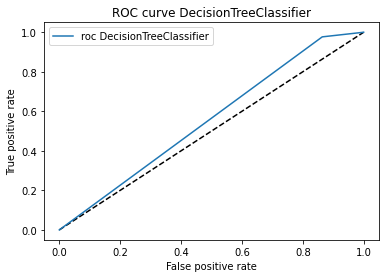

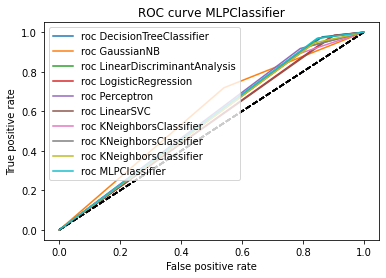

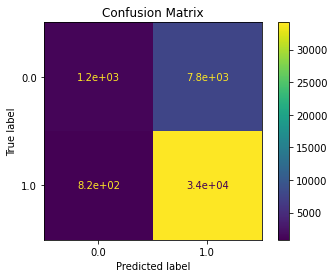

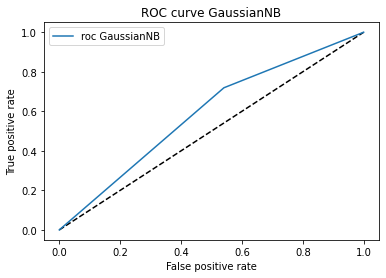

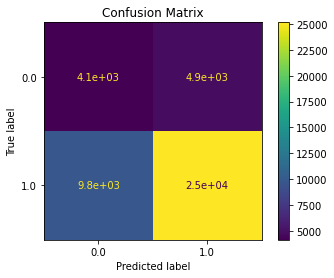

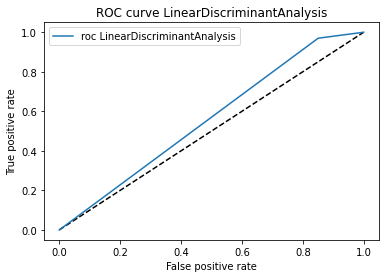

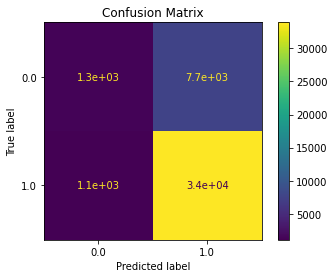

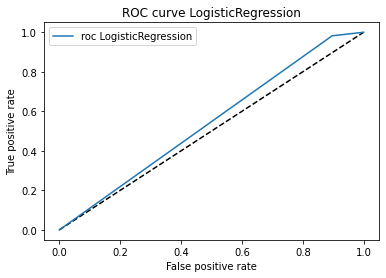

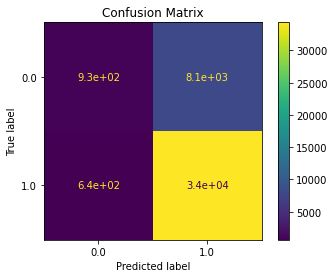

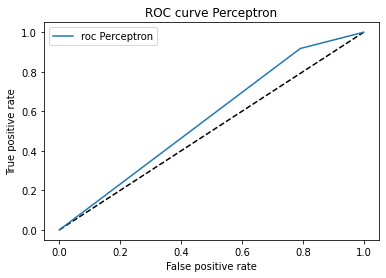

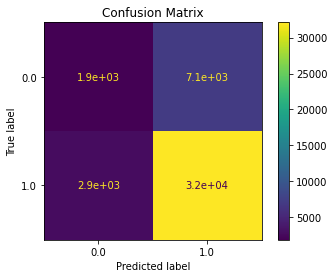

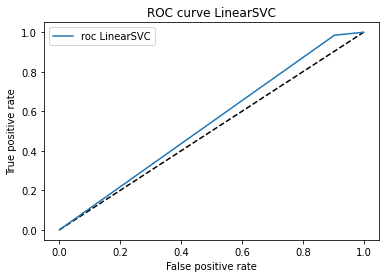

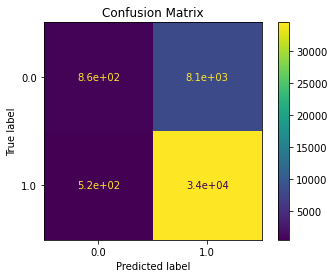

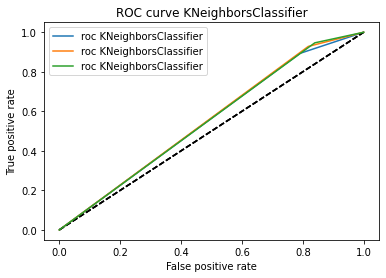

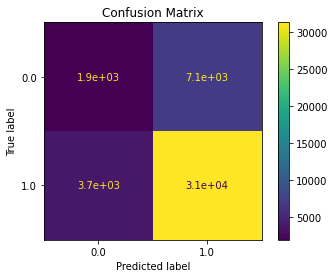

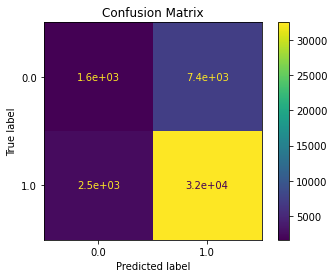

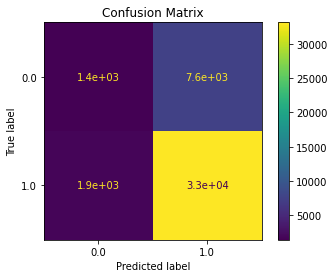

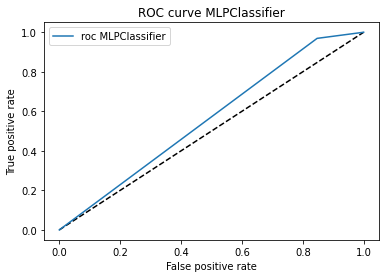

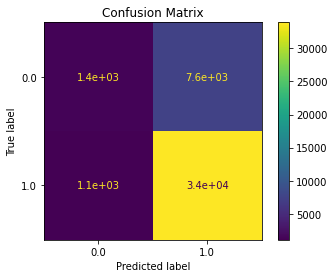

In [12]:
orchestrator = get_orchestrator(FILE_ORCHESTRATOR)
configs = orchestrator["configs"]
output_table = get_output_table(configs, experiment_hash)
experiments = orchestrator["experiments"]
run_orchestrator(configs, experiments)
output_table["tabulation_file"].close()